In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-26 22:09:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Risoluzione di raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connessione a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1423529 (1,4M) [text/plain]
Salvataggio in: «housing.csv»

housing.csv         100%[===================>]   1,36M  1,80MB/s    in 0,8s    

2022-09-26 22:09:31 (1,80 MB/s) - «housing.csv» salvato [1423529/1423529]



In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('./housing.csv')
print(df.shape)
df

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
# Features 

features = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity',]

In [8]:
df = df[features]
print(df.shape)
df

(20640, 10)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
df.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [10]:
# Data preparation

# Select only the features from above and fill in the missing values with 0.
df = df.fillna(0)

# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df.total_rooms / df.households

# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms

# Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df.population / df.households

In [11]:
df.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [12]:
# Question 1
# What is the most frequent observation (mode) for the column ocean_proximity?

df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

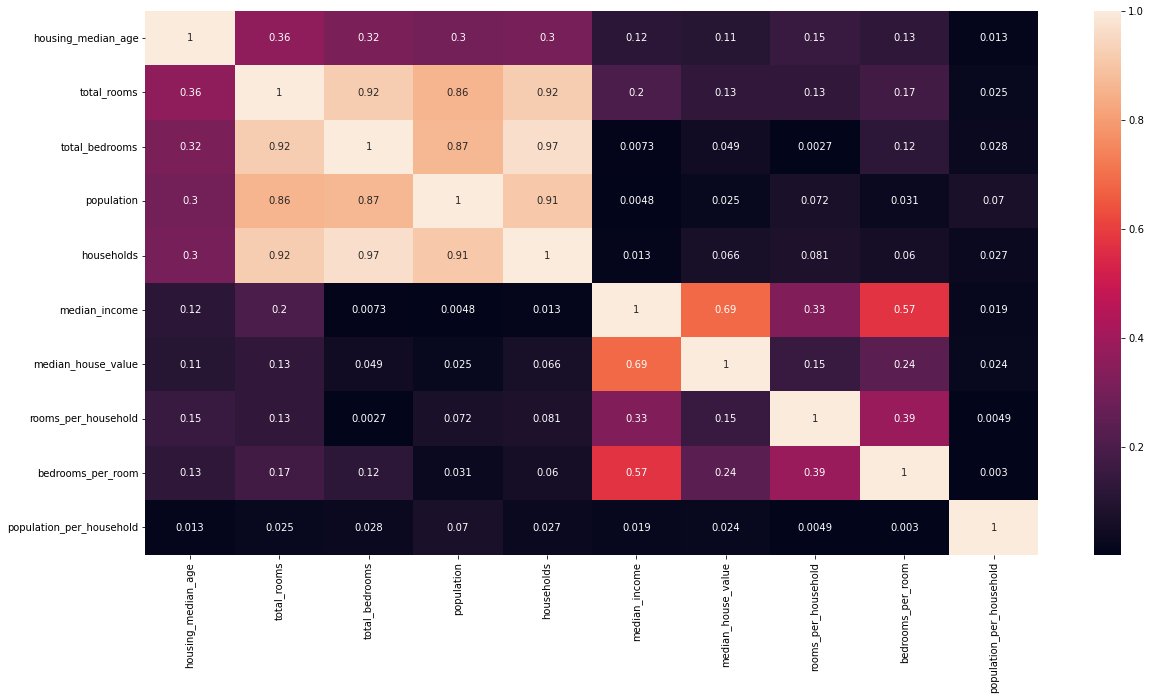

In [14]:
# Question 2
# What are the two features that have the biggest correlation in this dataset?

numerical = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

df_corr = df[numerical].corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True)
plt.show()

In [17]:
# Split the data
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
# Make sure that the target value (median_house_value) is not in your dataframe.

df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


In [18]:
# Make median_house_value binary
# - We need to turn the median_house_value variable from numeric into binary.
# - Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

average = y_train.mean()
y_above_average_train = (y_train > average).astype(int)
y_above_average_val = (y_val > average).astype(int)
y_above_average_test = (y_test > average).astype(int)

In [23]:
# Question 3
# Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
# What is the value of mutual information?
# Round it to 2 decimal digits using round(score, 2)

round(mutual_info_score(df_train[['ocean_proximity'][0]], y_above_average_train), 2)

0.1

In [25]:
# Question 4
# Now let's train a logistic regression
# Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
# Fit the model on the training dataset.
# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
# model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_above_average_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [26]:
# Question 4
# # Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

y_pred = model.predict(X_val)
accuracy = (y_pred == y_above_average_val).mean()
round(accuracy, 2)

0.83

In [27]:
# Question 5
# Let's find the least useful feature using the feature elimination technique.
# Train a model with all these features (using the same parameters as in Q4).
# Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
# For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

accuracy_differences = []
all_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

for f in all_features:
    features = all_features.copy()
    features.remove(f)

    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model.fit(X_train, y_above_average_train)

    y_pred = model.predict(X_val)
    accuracy_differences.append(abs(accuracy - (y_pred == y_above_average_val).mean()))

print(sorted(list(zip(all_features, accuracy_differences)), key=lambda k: k[1]))


[('total_rooms', 0.0006055101422948184), ('total_bedrooms', 0.0009082652134423386), ('rooms_per_household', 0.0012110202845897478), ('bedrooms_per_room', 0.0012110202845897478), ('population_per_household', 0.0012110202845897478), ('latitude', 0.0027247956403270157), ('longitude', 0.004844081138359102), ('housing_median_age', 0.005449591280654031), ('households', 0.005752346351801441), ('population', 0.008477141992128345), ('ocean_proximity', 0.015440508628519534), ('median_income', 0.050862851952770294)]


In [29]:
# Question 6
# For this question, we'll see how to use a linear regression model from Scikit-Learn
# We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
# Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
# This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
# Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.


train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

alpha = [0, 0.01, 0.1, 1, 10]
rmse = []

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

for a in alpha:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train_log)
    
    y_pred = model.predict(X_val)
    rmse.append(round(mean_squared_error(y_val_log, y_pred, squared=False), 3))

print(sorted(list(zip(alpha, rmse)), key=lambda k: k[1], reverse=True))



[(0, 0.523), (0.01, 0.523), (0.1, 0.523), (1, 0.523), (10, 0.523)]
